In [27]:
!pip install umap-learn pandas matplotlib seaborn

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


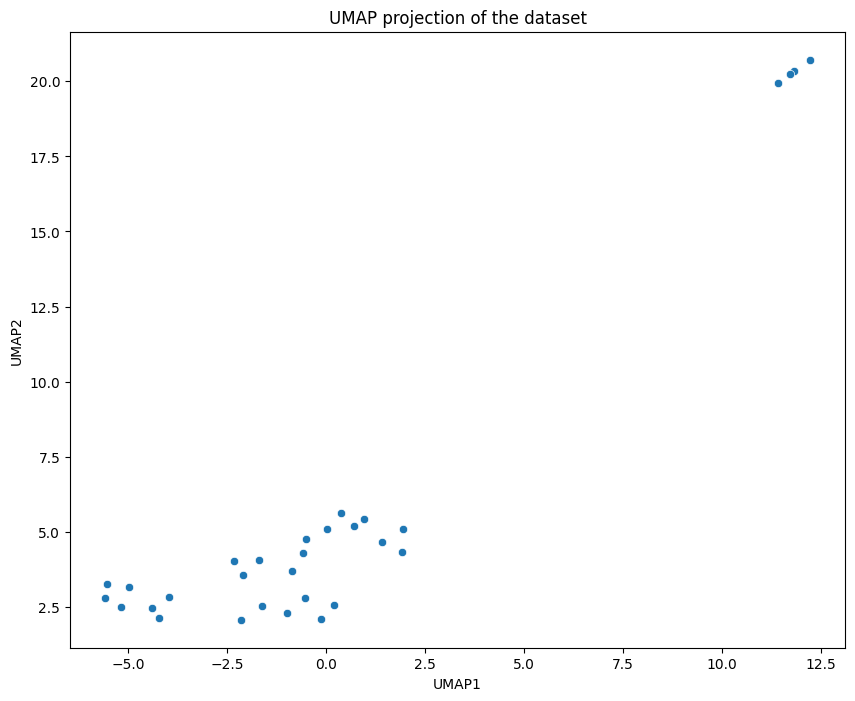

In [28]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (adjust path if needed)
df = pd.read_csv('/kaggle/input/dm-a2-salil/DM-A2_cleaned - Sheet1.csv')

# Drop non-numeric columns (e.g., ID)
df_numeric = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ID'], errors='ignore')

# Check for NaN values and fill or drop them
df_numeric = df_numeric.fillna(df_numeric.mean())  # Or use .dropna() to drop missing rows

# Perform UMAP analysis
reducer = umap.UMAP(n_neighbors=4, min_dist=0.3, random_state=42)
embedding = reducer.fit_transform(df_numeric)

# Create a DataFrame for the UMAP result
umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df)
plt.title('UMAP projection of the dataset')
plt.show()

In [29]:
import pandas as pd

def calculate_similarity(row1, row2, method="symmetric"):
    """Calculates similarity between two rows based on specified method."""
    if method == "symmetric":
        shared_traits = (row1 == row2).sum()  # Check equality across all traits
        total_traits = len(row1)
        return shared_traits / total_traits
    elif method == "asymmetric":
        shared_traits = ((row1 == "P") & (row2 == "P")).sum()  # Both traits must be 'P'
        total_traits = (row1 == "P").sum()  # Only count 'P' in row1
        return shared_traits / total_traits if total_traits > 0 else 0
    else:
        raise ValueError("Invalid method: must be 'symmetric' or 'asymmetric'")

def find_most_compatible_pair(df, method="symmetric"):
    """Finds the most compatible pair of individuals based on specified method."""
    similarities = {}
    for i, row1 in df.iterrows():
        for j, row2 in df.iterrows():
            if i != j:
                key = (row1["name"], row2["name"])
                similarities[key] = calculate_similarity(row1[1:], row2[1:], method)

    return max(similarities, key=lambda k: similarities[k])

# Sample data
data = {
    "name": ["Kevin", "Eric", "Caroline"],
    "trait_1": ["P", "P", "N"],
    "trait_2": ["P", "N", "P"],
    "trait_3": ["P", "P", "N"],
    "trait_4": ["N", "P", "P"],
    "trait_5": ["N", "N", "N"],
    "trait_6": ["N", "N", "N"],
    "trait_7": ["P", "N", "N"]
}

df = pd.DataFrame(data)

# Find most compatible pairs
most_compatible_symmetric = find_most_compatible_pair(df, method="symmetric")
most_compatible_asymmetric = find_most_compatible_pair(df, method="asymmetric")

print("Most compatible pair under symmetric attributes:", most_compatible_symmetric)
print("Most compatible pair under asymmetric attributes:", most_compatible_asymmetric)


Most compatible pair under symmetric attributes: ('Kevin', 'Eric')
Most compatible pair under asymmetric attributes: ('Eric', 'Kevin')


/tmp/ipykernel_30/1107617422.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Social problems'].fillna(data['Social problems'].mean(), inplace=True)


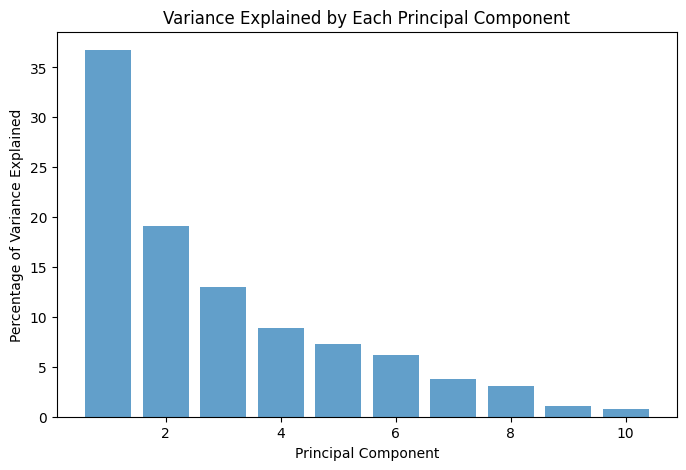

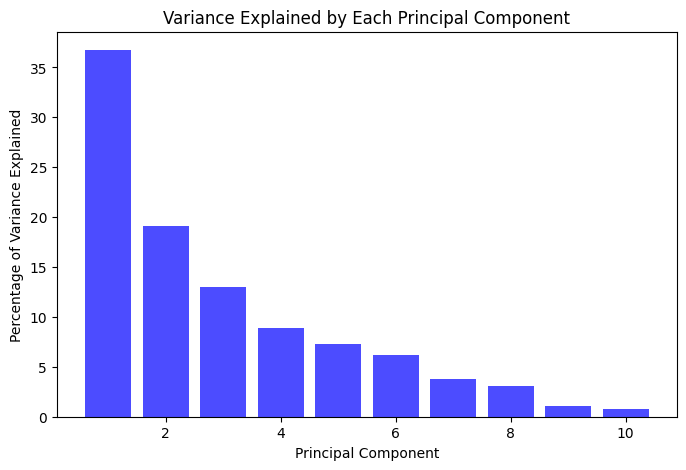

In [30]:
data = pd.read_csv('/kaggle/input/dm-a2-salil/DM-A2_cleaned - Sheet1.csv')
# Step 1: Data Cleaning and Transformation

# 1. Impute missing values in 'Social problems' column using the mean
data['Social problems'].fillna(data['Social problems'].mean(), inplace=True)

# 2. Handle the row with zero values (likely an outlier). We will drop it if all features are zero.
# Identify and drop the row if the sum of its values (excluding index) is zero
data_cleaned = data.loc[~(data.iloc[:, 1:] == 0).all(axis=1)]

# 3. Scale/normalize the data using z-score normalization (Standardization)
from sklearn.preprocessing import StandardScaler

# Exclude the first column 'D' as it's likely an ID, normalize the rest
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned.iloc[:, 1:])

# Create a DataFrame for the scaled data
data_scaled_df = pd.DataFrame(data_scaled, columns=data_cleaned.columns[1:])

# Show the cleaned and scaled data
data_cleaned.shape, data_scaled_df.head()

# Step 2: Covariance matrix and computations

import numpy as np

# a) Compute covariance matrix of the scaled data
cov_matrix = np.cov(data_scaled_df.T)

# b) Total variance: Sum of diagonal elements of covariance matrix
total_variance = np.sum(np.diag(cov_matrix))

# c) Compute Pearson's correlation between "Fluid IQ" and "Crystallized IQ" (Variable 1 and Variable 2)
corr_fluid_crystallized = np.corrcoef(data_scaled_df['Fluid IQ'], data_scaled_df['Crystallized IQ'])[0, 1]

# Output results
cov_matrix, total_variance, corr_fluid_crystallized

# Step 3: Perform PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA on the scaled data
pca = PCA()
pca.fit(data_scaled_df)

# a) Plot percentage of variances of each Principal Component (PC) in decreasing order
explained_variance = pca.explained_variance_ratio_ * 100  # Convert to percentage
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('Variance Explained by Each Principal Component')
plt.show()

# b) Determine how many components capture >85% of the variance
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance > 85) + 1  # Find the number of components

# Show the number of components needed to capture > 85% variance
n_components

# Assuming you have already performed PCA and stored the explained variance ratios

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Perform PCA on your data (data_scaled_df is your normalized dataset)
pca = PCA()
pca.fit(data_scaled_df)

# Explained variance in percentage
explained_variance = pca.explained_variance_ratio_ * 100

# Plotting the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.show()

In [31]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'data_scaled_df' is your scaled data
pca = PCA()
pca.fit(data_scaled_df)

# Explained variance by each component
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Find the number of components that capture >85% variance
n_components = np.argmax(cumulative_variance > 0.85) + 1

# Output the result
print(f'Number of components needed to capture >85% variance: {n_components}')

Number of components needed to capture >85% variance: 6


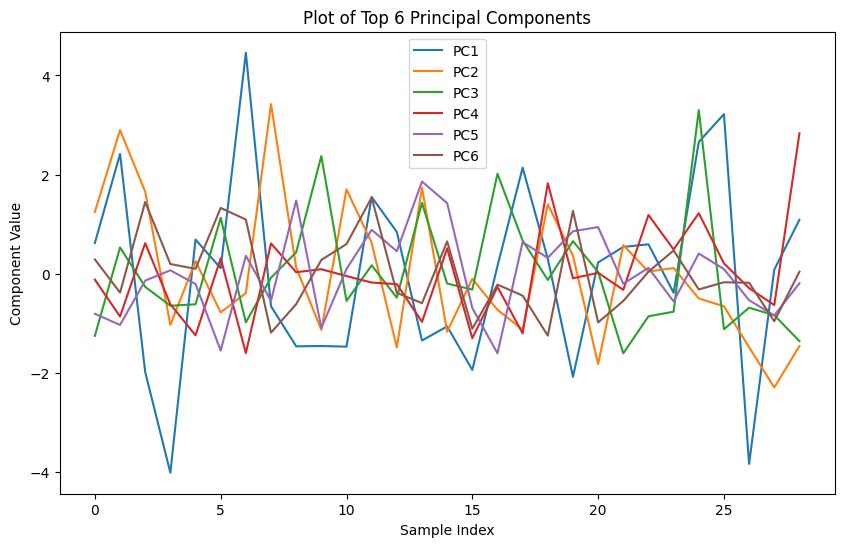

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data_scaled_df' is your scaled data
pca = PCA()
principal_components = pca.fit_transform(data_scaled_df)

# Select the top N components that capture >85% of the variance
N = n_components  # Use the value calculated in the previous step
top_N_components = principal_components[:, :N]

# Plot the N principal components (each as a line)
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(top_N_components[:, i], label=f'PC{i+1}')

plt.title(f'Plot of Top {N} Principal Components')
plt.xlabel('Sample Index')
plt.ylabel('Component Value')
plt.legend()
plt.show()


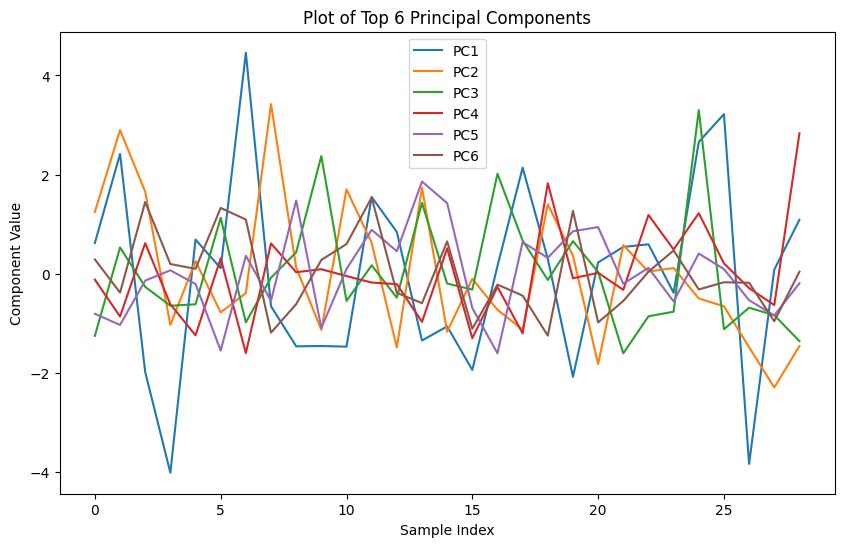

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data_scaled_df' is your scaled data
pca = PCA()
principal_components = pca.fit_transform(data_scaled_df)

# Select the top P components that you want to plot
P = n_components  # Define P as the number of components you want to plot
top_P_components = principal_components[:, :P]

# Plot the P principal components (each as a line)
plt.figure(figsize=(10, 6))
for i in range(P):
    plt.plot(top_P_components[:, i], label=f'PC{i+1}')

plt.title(f'Plot of Top {P} Principal Components')
plt.xlabel('Sample Index')
plt.ylabel('Component Value')
plt.legend()
plt.show()


In [34]:
import numpy as np

# Assuming 'top_P_components' contains your selected principal components
covariance_matrix = np.cov(top_P_components, rowvar=False)

# Display the covariance matrix
print("Covariance Matrix of the Top P Principal Components:")
print(covariance_matrix)

Covariance Matrix of the Top P Principal Components:
[[ 3.80573576e+00 -3.66982678e-16 -1.34658430e-17 -3.47474949e-17
   2.39186012e-16 -1.70200090e-16]
 [-3.66982678e-16  1.97585731e+00  1.68530159e-16 -2.90877699e-16
   4.03783812e-17 -3.68910873e-16]
 [-1.34658430e-17  1.68530159e-16  1.34201769e+00 -4.32233800e-16
  -8.10662922e-18 -2.32186527e-16]
 [-3.47474949e-17 -2.90877699e-16 -4.32233800e-16  9.19489491e-01
  -1.07997755e-16  2.21256782e-17]
 [ 2.39186012e-16  4.03783812e-17 -8.10662922e-18 -1.07997755e-16
   7.58785616e-01  3.88122731e-16]
 [-1.70200090e-16 -3.68910873e-16 -2.32186527e-16  2.21256782e-17
   3.88122731e-16  6.45008663e-01]]


In [35]:
import numpy as np
from scipy.stats import pearsonr

# Assuming 'top_P_components' contains your selected principal components
PC1 = top_P_components[:, 0]
PC2 = top_P_components[:, 1]

# Calculate Pearson's correlation coefficient
correlation_coefficient, p_value = pearsonr(PC1, PC2)

# Display the results
print(f"Pearson's correlation coefficient between PC1 and PC2: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson's correlation coefficient between PC1 and PC2: -1.3530843112619095e-16
P-value: 0.9999999999999991
